# PLOTTING UNIFIED JSON

In [1]:

#import data and packages
import geopandas
import pandas as pd
import matplotlib.pyplot as plt
from functions import *
from gis_functions import *


data=geopandas.read_file('final/complete.geojson')
#data_pop=geopandas.read_file('final/gkz_pop+data.gpkg')


In [2]:
#why do i still  get comma values in legend?
data.sum_PE=data.sum_PE.astype('int')


In [3]:
data.mean_year.max()
data.sort_values('mean_year')
data[data.mean_year==0].BL.unique() ##### all 0s come from steiermark
data[data.mean_year>2020].BL.unique() ### all wrongs come from Salzburg
data[data.mean_year<1800].BL.unique() ### karnten and salzburg has 
data[data.mean_year<1800] ### something very wrong with steiermark years


id  %PE_nonitri  %before_reg  %no_nitri        BL    GKZ          KG  \
1693  452    83.333333         80.0       80.0  Carintia  20632    Oberdorf   
2294  113    80.952381          0.0       80.0  Salzburg  50205    Dürnberg   
2387  206    29.411765          0.0       75.0  Salzburg  50612  Hinterthal   
2433  252     0.000000          0.0        0.0  Salzburg  50613    Paßthurn   

      PE_nonitri  before_reg  freq  mean_year  no_nitri  sum_PE  \
1693  200.000000           4     5       1630         4     240   
2294   28.333333           0     5       1621         4      35   
2387    6.666667           0     4       1000         3      22   
2433    0.000000           0     8       1753         0     119   

                                               geometry  
1693  POLYGON ((13.61124 47.01909, 13.61113 47.01917...  
2294  POLYGON ((13.09795 47.63372, 13.09816 47.63444...  
2387  POLYGON ((12.97875 47.38090, 12.97804 47.38125...  
2433  POLYGON ((12.41600 47.28889, 12.41603 47.28908...

<AxesSubplot:>

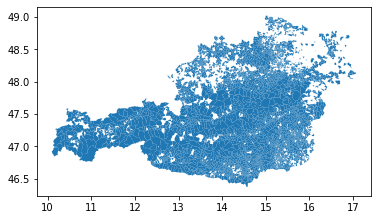

In [4]:
data.plot()

In [7]:
#prepare basemaps
basemap=geopandas.read_file('DATA/shp_new/Oesterreich_BEV_VGD_LAM.shp')
basemap.KG_NR=basemap.KG_NR.astype(int)
basemap.to_crs(epsg=4326,inplace=True)

In [8]:
#BLs=basemap.dissolve(by='BL')
#BLs.geometry.boundary.plot()
#BLs.to_file('plotting_data/BL_bounds.gpkg',driver='GPKG')
BLs=geopandas.read_file('plotting_data/BL_bounds.gpkg')
GKZ=geopandas.read_file('plotting_data/GKZ_bounds.gpkg')

In [56]:
#GKZ=basemap.dissolve(by='GKZ')
#GKZ.to_file('plotting_data/GKZ_bounds.gpkg',driver='GPKG')



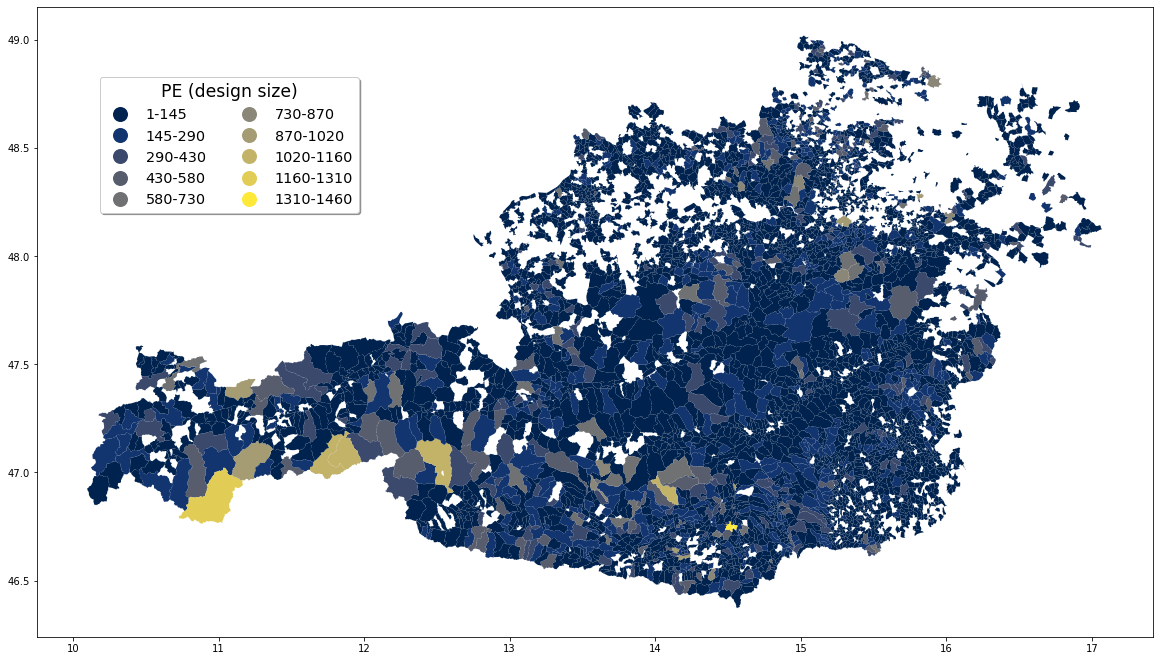

In [61]:
#plot for PE
fig,ax=plt.subplots(1,figsize=(20,30))
data.plot(column='sum_PE',cmap='cividis', ax=ax, legend=True, scheme='EqualInterval', k=10,                          # EqualInterval is good
           legend_kwds={'loc': 'upper left','ncol':2, 'shadow': 'True', 'title': 'PE (design size)', 'bbox_to_anchor':[0.05,0.9], 'fancybox':'True','frameon':'True', 'fontsize':'x-large', 'markerscale':1.5, 'title_fontsize':'xx-large'})                            # cividis good

leg_labes=['1-145','145-290','290-430','430-580','580-730','730-870','870-1020','1020-1160','1160-1310','1310-1460']
leg=ax.get_legend()
for text, label in zip(leg.get_texts(), leg_labes):
    text.set_text(label)


# KG resolution



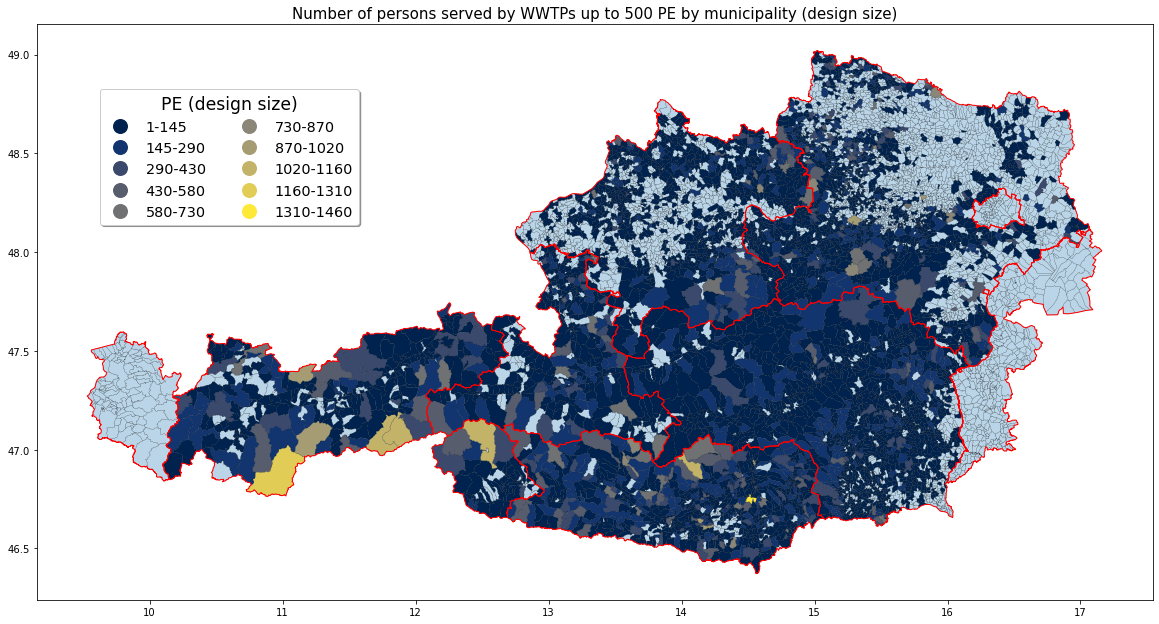

In [62]:
#plot for PE
fig,ax=plt.subplots(1,figsize=(20,30))
basemap.plot(ax=ax, alpha=0.3)
ax.set_title('Number of persons served by WWTPs up to 500 PE by municipality (design size)', fontsize=15)
data.plot(column='sum_PE',cmap='cividis', ax=ax, legend=True, scheme='EqualInterval', k=10,                          # EqualInterval is good
           legend_kwds={'loc': 'upper left','ncol':2, 'shadow': 'True', 'title': 'PE (design size)', 'bbox_to_anchor':[0.05,0.9], 'fancybox':'True','frameon':'True', 'fontsize':'x-large', 'markerscale':1.5, 'title_fontsize':'xx-large'})                            # cividis good


leg_labes=['1-145','145-290','290-430','430-580','580-730','730-870','870-1020','1020-1160','1160-1310','1310-1460']
leg=ax.get_legend()
for text, label in zip(leg.get_texts(), leg_labes):
    text.set_text(label)


#plot KG boundaries
basemap.geometry.boundary.plot(edgecolor='k', linewidth=0.1, ax=ax)

#print BL boundary
BLs.geometry.boundary.plot(edgecolor='r', linewidth=1, ax=ax)

plt.savefig('plots/all_PE.png', bbox_inches='tight' )

In [9]:
#percentage of non-nitriin total
data.PE_nonitri.sum()/data.sum_PE.sum()*100





19.005327206766054

# NON-NITRIFYING


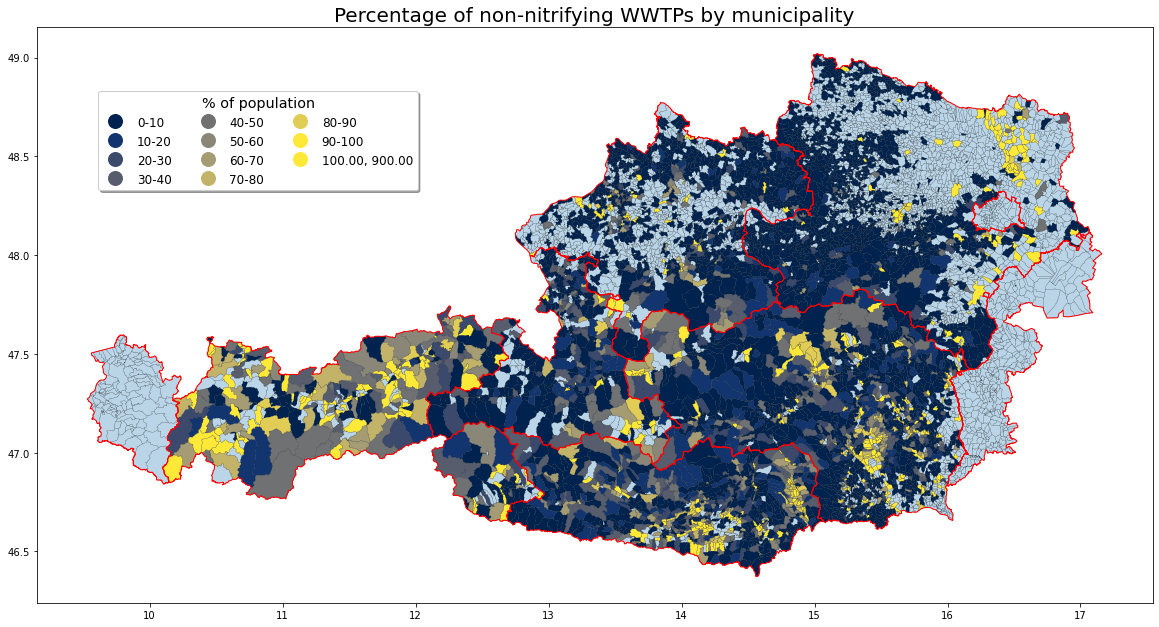

In [76]:
#plot for old infrastructure density. 
fig,ax=plt.subplots(1,figsize=(20,30))
basemap.plot(ax=ax, alpha=0.3)
data.plot(column='%no_nitri', ax=ax,legend=True,scheme='user_defined',classification_kwds={'bins':[10,20,30,40,50,60,70,80,90,100,900]},cmap='cividis', k=10,
           legend_kwds={'loc': 'upper left','ncol':3, 'shadow': 'True', 'title': '% of population', 'bbox_to_anchor':[0.05,0.9], 'fancybox':'True','frameon':'True', 'fontsize':'large', 'markerscale':1.5, 'title_fontsize':'x-large'})                            # cividis good
ax.set_title('Percentage of non-nitrifying WWTPs by municipality', fontsize=20)

leg_labes=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100']
leg=ax.get_legend()
for text, label in zip(leg.get_texts(), leg_labes):
    text.set_text(label)


#plot KG boundaries
basemap.geometry.boundary.plot(edgecolor='k', linewidth=0.1, ax=ax)

#print BL boundary
BLs.geometry.boundary.plot(edgecolor='r', linewidth=1, ax=ax)

plt.savefig('plots/all_nonitri%.png', bbox_inches='tight' )

# PE on POP

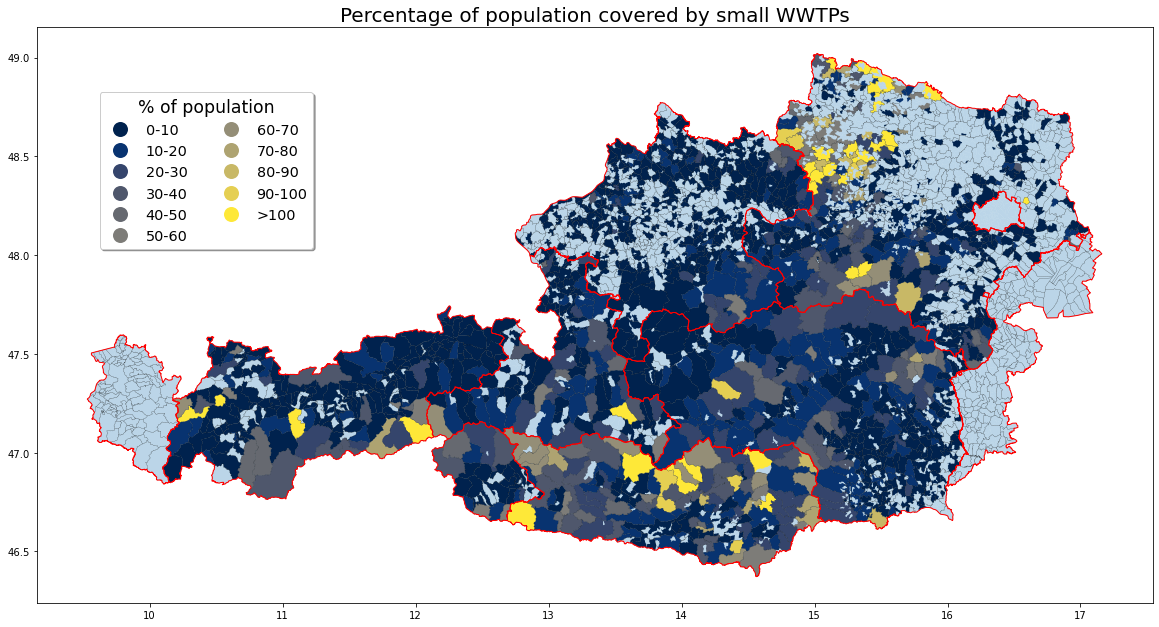

In [68]:
fig,ax=plt.subplots(1,figsize=(20,30))
basemap.plot(ax=ax, alpha=0.3)
data_pop.plot(column='%PEonpop', ax=ax,legend=True,scheme='user_defined',cmap='cividis',classification_kwds={'bins':[10,20,30,40,50,60,70,80,90,100,900]},
           legend_kwds={'loc': 'upper left','ncol':2, 'shadow': 'True', 'title': '% of population', 'bbox_to_anchor':[0.05,0.9], 'fancybox':'True','frameon':'True', 'fontsize':'x-large', 'markerscale':1.5, 'title_fontsize':'xx-large'})                            # cividis good
plt.title('percentage of population covered by small'.capitalize()+' WWTPs', fontsize=20)

#plot KG boundaries
GKZ.geometry.boundary.plot(edgecolor='k', linewidth=0.1, ax=ax)

#print BL boundary
BLs.geometry.boundary.plot(edgecolor='r', linewidth=1, ax=ax)


leg_labes=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100','>100']
leg=ax.get_legend()
for text, label in zip(leg.get_texts(), leg_labes):
    text.set_text(label)

plt.savefig('plots/all_PE_pop.png', bbox_inches='tight' )

# NOnitri PE on POP 
### attention. boundaries are KG but data in on GKZ!!

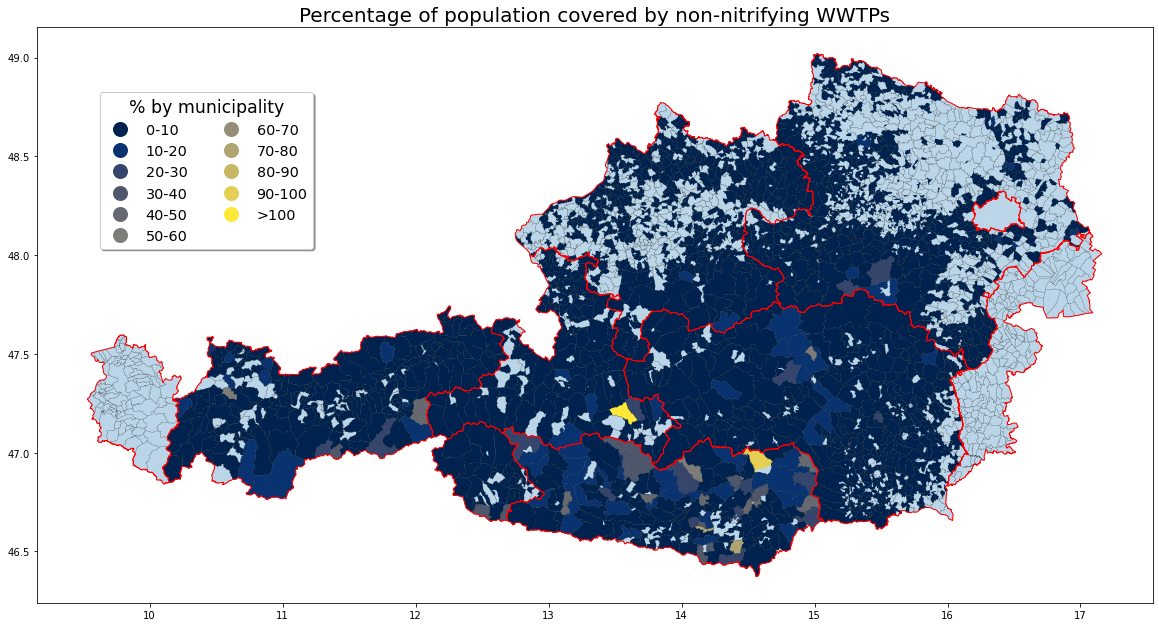

In [75]:
fig,ax=plt.subplots(1,figsize=(20,30))
basemap.plot(ax=ax, alpha=0.3)
data_pop.plot(column='%nonitriPEonpop', ax=ax,legend=True,scheme='user_defined',cmap='cividis',classification_kwds={'bins':[10,20,30,40,50,60,70,80,90,100,900]}, 
           legend_kwds={'loc': 'upper left','ncol':2, 'shadow': 'True', 'title': '% by municipality', 'bbox_to_anchor':[0.05,0.9], 'fancybox':'True','frameon':'True', 'fontsize':'x-large', 'markerscale':1.5, 'title_fontsize':'xx-large'})                            # cividis good
ax.set_title('percentage of population covered by non-nitrifying'.capitalize()+' WWTPs', fontsize=20)

#plot KG boundaries
GKZ.geometry.boundary.plot(edgecolor='k', linewidth=0.1, ax=ax)

#print BL boundary
BLs.geometry.boundary.plot(edgecolor='r', linewidth=1, ax=ax)

leg_labes=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100','>100']
leg=ax.get_legend()
for text, label in zip(leg.get_texts(), leg_labes):
    text.set_text(label)

plt.savefig('plots/all_nonitri%_pop.png', bbox_inches='tight' )

<AxesSubplot:title={'center':'Distribution of non-nitrifyied PEs by municipality'}>

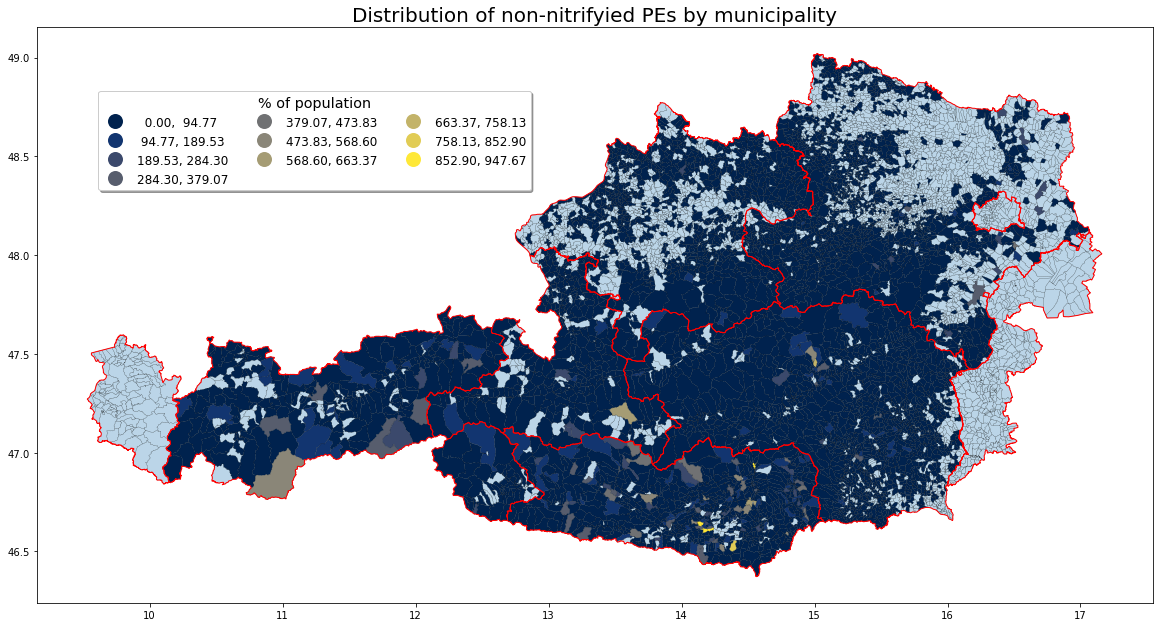

In [36]:
fig,ax=plt.subplots(1,figsize=(20,30))
basemap.plot(ax=ax, alpha=0.3)
data.plot(column='PE_nonitri', ax=ax,legend=True,scheme='equal_interval',cmap='cividis', k=10,
           legend_kwds={'loc': 'upper left','ncol':3, 'shadow': 'True', 'title': '% of population', 'bbox_to_anchor':[0.05,0.9], 'fancybox':'True','frameon':'True', 'fontsize':'large', 'markerscale':1.5, 'title_fontsize':'x-large'})                            # cividis good
ax.set_title('Distribution of non-nitrifyied PEs by municipality', fontsize=20)

#leg_labes=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100']
#leg=ax.get_legend()
#for text, label in zip(leg.get_texts(), leg_labes):
#    text.set_text(label)


#plot KG boundaries
basemap.geometry.boundary.plot(edgecolor='k', linewidth=0.1, ax=ax)

#print BL boundary
BLs.geometry.boundary.plot(edgecolor='r', linewidth=1, ax=ax)

#plt.savefig('plots/all_nonitri%.png', bbox_inches='tight' )


2 parameters as potentiol of environmental impact : PE sum and size of KG
given this, only carintia shows potential
maybe add further geo analisys on impact
like water bodies in vicinity

In [14]:
distri=data[['KG','PE_nonitri']]

# goal is here to understnad the distribution of nonitri PE
### if widely distributed should be no problem

In [32]:
distri.PE_nonitri.max()

947.6666666666666

<AxesSubplot:ylabel='Frequency'>

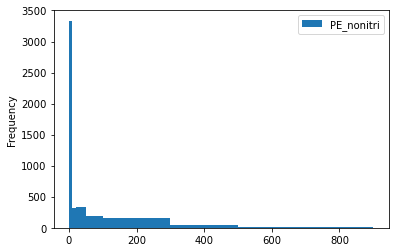

In [34]:
distri.plot(kind='hist', y='PE_nonitri', bins=[0,10,20,50,100,300,500,900])

<AxesSubplot:ylabel='Density'>

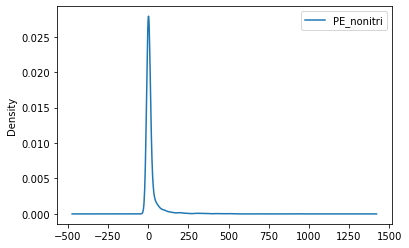

In [21]:
distri.plot(kind='kde',y='PE_nonitri')

In [11]:
data.PE_nonitri.mean()

18.04628450106157